# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Цели проекта
- Проанализировать исторические данные о поведении клиентов банка, расторжении договоров. 
- Спрогнозировать уход клиента из банка.
- Построить модель классификации, метрика качества f1 (минимальное значение 0.59)
- Измерить AUC-ROC, сравнить её значение с f1-мерой.

#### Признаки

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка, владение
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

#### Целевой признак
- Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import itertools

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle

Загрузим данные из файла Churn.csv, выведем первые 10 строк таблицы для первого взгляда на данные.
Также с помощью метода info() изучим структуру таблицы: типы данных, количество строк, столбцов, пропущенных данных.

In [2]:
# читаем данные из .csv файла с помощью метода read_csv()
try:
    df = pd.read_csv('D:\\python\\project_7\\Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

df.head(10)
# с помощью метода info() изучим структуру таблицы: типы данных, количество строк, столбцов, пропущенных данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Сразу приведем наименование столбцов к нижнему регистру для удобства восприятия.

In [3]:
df.columns = df.columns.str.lower()

In [4]:
# с помощью метода info() изучим структуру таблицы: типы данных, количество строк, столбцов, пропущенных данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rownumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
customerid,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
numofproducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
hascrcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactivemember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimatedsalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
df.isna().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

Наблюдаем большое количество пропусков в  столбце tenure. Исследуем поближе и попробуем восполнить пропуски, поскольку модель может плохо работать с пропущенными значениями.

In [7]:
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

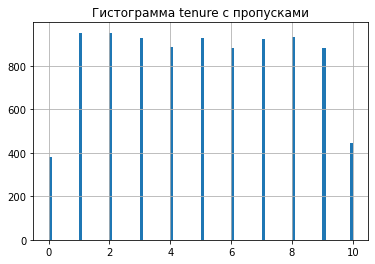

In [8]:
df['tenure'].hist(bins=100)
plt.title('Гистограмма tenure с пропусками')
plt.show()

Заполним пропуски tenure случайными значениями.

In [9]:
df.loc[df['tenure'].isna(), 'tenure'] = [random.randint(0, 10) for i in range(sum(df['tenure'].isna()))]

Проверяем распределение после заполнения.

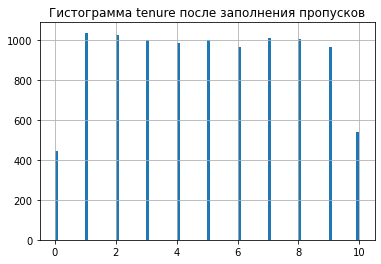

In [10]:
df['tenure'].hist(bins=100)
plt.title('Гистограмма tenure после заполнения пропусков')
plt.show()

Значения внутри гистограммы сильно не изменились.

Проверяем количество строк - дубликатов.

In [11]:
df.duplicated().sum()

0

Удалим столбцы, не несущие пользы для обучения будущей модели.

In [12]:
df = df.drop(['rownumber', 'customerid', 'surname'], axis=1)

Посмотрим на распределение внутри целевого признака.

In [13]:
df['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

Распределение внутри целевого признака "факт ухода клиента" приблизительно 4:1. То есть на первый взгляд каждый пятый клиент уходит из «Бета-Банка».

Поскольку в данных присутствуют категориальные и количественные признаки, то оптимальной техникой кодирования будет One-Hot Encoding (далее OHE). Ordinal Encoding нам не подходит, поскольку используется только для категориальных признаков.

Выделим количественные признаки и сохраним в переменной numeric (посредством удаления категориальных признаков):

Количественные признаки:

    creditscore
    age
    tenure
    balance
    numofproducts
    estimatedsalary
    
Категориальные признаки:

    geography
    gender
    hascrcard
    isactivemember
    exited

In [14]:
numeric = df.drop(['geography', 'gender', 'hascrcard', 'isactivemember', 'exited'], axis=1)

Посмотрим на таблицу корреляции

In [15]:
df.corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.003965,0.001129,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.014928,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.001129,-0.014928,1.000000,-0.008402,0.001402,0.024006,-0.032123,0.008221,-0.013963
balance,0.006268,0.028308,-0.008402,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.012238,-0.030680,0.001402,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,-0.005458,-0.011721,0.024006,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.025651,0.085472,-0.032123,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.001384,-0.007201,0.008221,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.013963,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


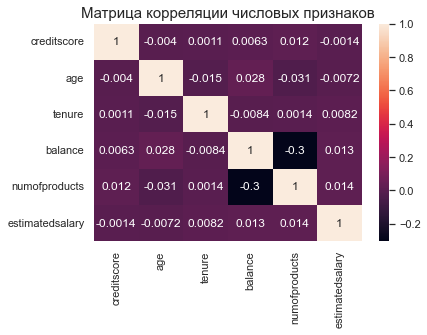

In [16]:
sns.set(font_scale=1)
sns.heatmap(numeric.corr(), annot=True)
plt.title('Матрица корреляции числовых признаков', fontsize=15)

plt.show()

Сильнее всего выражена отрицательная зависимость баланса на счете от количества продуктов банка. Тем не менее ярко выраженных зависимостей между признаками не наблюдается.

Посмотрим на количество пользователей в столбце "geography"

In [17]:
df['geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: geography, dtype: float64

Половна клиентов сосредоточена во Франции. Остальные клиенты находятся во Франции и Германии.

In [18]:
df.groupby('geography')['exited'].agg(['count','mean'])

,count,mean
geography,,
France,5014,0.161548
Germany,2509,0.324432
Spain,2477,0.166734


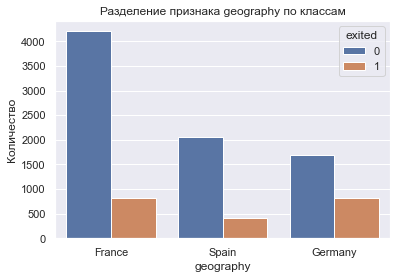

In [19]:
sns.countplot(x=df['geography'], hue=df['exited'])
plt.ylabel('Количество')
plt.title("Разделение признака geography по классам");

Самый большой процент ухода клиентов из банка в Германии - 32%. В Испании и Франции порядка 16 %.

Оценим соотношение мужчин и женщин.

In [20]:
df['gender'].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

Также оценим соотношение по остальным категориальным признакам.

In [21]:
df['isactivemember'].value_counts(normalize=True)

1    0.5151
0    0.4849
Name: isactivemember, dtype: float64

In [22]:
df['hascrcard'].value_counts(normalize=True)

1    0.7055
0    0.2945
Name: hascrcard, dtype: float64

Обработка категориальных признаков техникой One-Hot Encoding

In [23]:
# кодирование с помощью OHE
df = pd.get_dummies(df, drop_first=True)

Вывод:

- Данные успешно загружены и изучены
- Обнаружены пропуски Nan в столбце tenure, заполнены с помощью цикла и генерации случайных чисел, модуля random
- Дубликаты не обнаружены
- Изучена матрица корреляции, взаимосвязи мешающие обучению моделей не выявлены
- Произведено кодирование, признаки приведены к единому масштабу и стандартизированы при помощи StandardScaler

## Исследование задачи

- Целевой признак, то есть признак, который необходимо определить - это столбец exited.
- Признаками в исходных данных являются остальные столбцы.

In [24]:
features = df.drop('exited', axis=1)
target = df['exited']

Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1 соответственно (60% на обучающую и по 20% данных на валидационную и тестовую выборки). Такое соотношение оптимально, нет риска переобучения модели.

In [25]:
# 1 этап разделения на обучающую выборку features_train и (валидационную + тестовую) features_valid
# отделяем 40% (20% данных для валидационной и 20% для тестовой) выборки
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345) 

print('Размер обучающей выборки:', features_train.shape[0],'объектов')
print('Размер "валидационной + тестовой" выборки:', features_valid.shape[0],'объектов')
print('----------------------------')

# разделим полученные 40% выборки на валидационную + тестовую. Разделим данные напополам

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345) 

print('Размер валидационной выборки:', features_valid.shape[0],'объектов')
print('Размер тестовой выборки:', features_test.shape[0],'объектов')
print('----------------------------')

Размер обучающей выборки: 6000 объектов
Размер "валидационной + тестовой" выборки: 4000 объектов
----------------------------
Размер валидационной выборки: 2000 объектов
Размер тестовой выборки: 2000 объектов
----------------------------


Данные успешно разделены на выборки : обучающую, валидационную и тестовую.

In [26]:
target_train.value_counts(normalize=True)

0    0.800667
1    0.199333
Name: exited, dtype: float64

In [27]:
target_valid.value_counts(normalize=True)

0    0.791
1    0.209
Name: exited, dtype: float64

Разница в соотношениях целевого признака в выборках обучающей и валидационной в пределах 1 %. 
То есть как и в основном датасете распределение внутри целевого признака "факт ухода клиента" остается в соотношении 4:1.

Чтобы алгоритмам было легче обучать модели, признаки приводятся к одному масштабу.
Один из методов масштабирования — стандартизация данных.
В sklearn есть отдельная структура для стандартизации данных — StandardScaler (от англ. «преобразователь масштаба методом стандартизации»)

In [28]:
scaler = StandardScaler()

numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

scaler.fit(df[numeric])
df[numeric] = scaler.transform(df[numeric])

In [29]:
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,-0.326221,0.293517,-1.032546,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.375322,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.024113,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.375322,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.032546,0.785728,-0.911583,1,1,-0.365276,0,0,1,0


- Произведено кодирование, признаки приведены к единому масштабу и стандартизированы при помощи StandardScaler

### RandomForestClassifier

Сначала обучим модель RandomForestClassifier со стандартными параметрами без учета дисбаланса классов, оценим Accuracy и F1_Score

In [30]:
model = RandomForestClassifier(random_state=12345)

model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)

recall = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)

print('Доля правильных ответов Accuracy:', accuracy_valid)
print('Полнота recall_score:', recall)
print('Точность precision_score:', precision)
print('f1_score:', f1_score(target_valid, predicted_valid))

confusion_matrix(target_valid, predicted_valid)

Доля правильных ответов Accuracy: 0.858
Полнота recall_score: 0.46411483253588515
Точность precision_score: 0.7637795275590551
f1_score: 0.5773809523809523


array([[1522,   60],
       [ 224,  194]], dtype=int64)

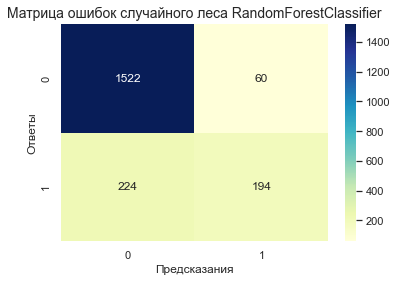

In [31]:
df_cm_rfc = pd.DataFrame(confusion_matrix(target_valid, predicted_valid))

sns.set(font_scale=1)
sns.heatmap(df_cm_rfc, annot=True, cmap='YlGnBu', fmt='d', annot_kws={'fontsize':12})
plt.title('Матрица ошибок случайного леса RandomForestClassifier', fontsize=14)
plt.xlabel('Предсказания', fontsize=12)
plt.ylabel('Ответы', fontsize=12)

plt.show()

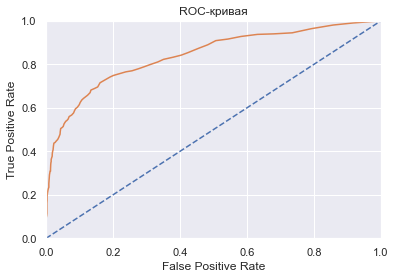

In [32]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr1, tpr1, thresholds1 = roc_curve(target_valid, probabilities_one_valid) #

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

In [33]:
roc_auc_rfc = roc_auc_score(target_valid, probabilities_one_valid)
print('roc_auc_rfc:', roc_auc_rfc)

roc_auc_rfc: 0.8409975562397547


Метрика оценки качества Accuracy получилась достаточно высокой, но поскольку выборка несбалансирована, рано делать выводы по этому значению.

Полнота recall описывает, как хорошо модель разобралась в особенностях этого класса и распознала его. Полнота recall_score ниже 0,5, следовательно модель плохо отличает искомые классы.

Метрика точности прогноза целевого класса precision_score выше, чем полнота. Precision выявляет, не переусердствует ли модель, присваивая положительные метки.

F1-мера (F1-score) - среднее гармоническое полноты и точности - 0.579 не соответствует условиям технического задания. Необходимо увеличить метрику до 0.59.

Модель верно предсказывает отрицательный класс, но ошибается в положительном и предсказывает множество ложноотрицательных ответов (FN - модель предсказала «0», а действительное значение класса — «1», то есть фактически клиент ушел). 

### LogisticRegression

In [34]:
model = LogisticRegression(random_state=12345, solver='liblinear')

model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)

recall = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)

print('Доля правильных ответов Accuracy:', accuracy_valid)
print('Полнота recall_score:', recall)
print('Точность precision_score:', precision)
print('f1_score:', f1_score(target_valid, predicted_valid))

confusion_matrix(target_valid, predicted_valid)

Доля правильных ответов Accuracy: 0.7815
Полнота recall_score: 0.04784688995215311
Точность precision_score: 0.3389830508474576
f1_score: 0.08385744234800838


array([[1543,   39],
       [ 398,   20]], dtype=int64)

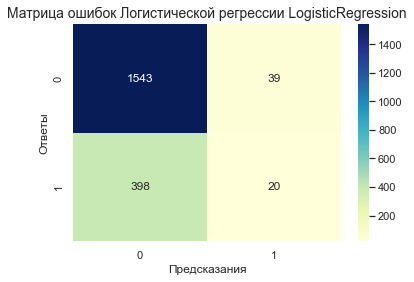

In [35]:
df_cm_lr = pd.DataFrame(confusion_matrix(target_valid, predicted_valid))

sns.set(font_scale=1)
sns.heatmap(df_cm_lr, annot=True, cmap='YlGnBu', fmt='d', annot_kws={'fontsize':12})
plt.title('Матрица ошибок Логистической регрессии LogisticRegression', fontsize=14)
plt.xlabel('Предсказания', fontsize=12)
plt.ylabel('Ответы', fontsize=12)

plt.show()

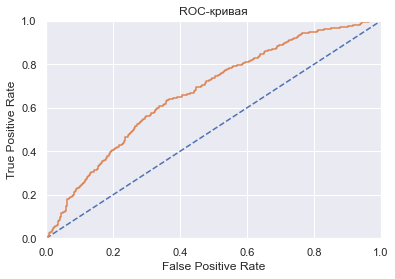

In [36]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr2, tpr2, thresholds2 = roc_curve(target_valid, probabilities_one_valid) #

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr2, tpr2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

In [37]:
roc_auc_lr = roc_auc_score(target_valid, probabilities_one_valid)
print('roc_auc_lr:', roc_auc_lr)

roc_auc_lr: 0.6727992547741034


### DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier(random_state=12345)

model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)

recall = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)

print('Доля правильных ответов Accuracy:', accuracy_valid)
print('Полнота recall_score:', recall)
print('Точность precision_score:', precision)
print('f1_score:', f1_score(target_valid, predicted_valid))

confusion_matrix(target_valid, predicted_valid)

Доля правильных ответов Accuracy: 0.7865
Полнота recall_score: 0.49282296650717705
Точность precision_score: 0.48931116389548696
f1_score: 0.4910607866507747


array([[1367,  215],
       [ 212,  206]], dtype=int64)

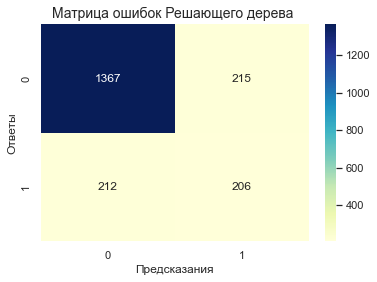

In [39]:
df_cm_dtc = pd.DataFrame(confusion_matrix(target_valid, predicted_valid))

sns.set(font_scale=1)
sns.heatmap(df_cm_dtc, annot=True, cmap='YlGnBu', fmt='d', annot_kws={'fontsize':12})
plt.title('Матрица ошибок Решающего дерева ', fontsize=14)
plt.xlabel('Предсказания', fontsize=12)
plt.ylabel('Ответы', fontsize=12)

plt.show()

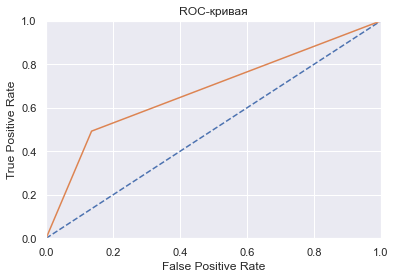

In [40]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr3, tpr3, thresholds3 = roc_curve(target_valid, probabilities_one_valid) #

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr3, tpr3)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

In [41]:
roc_auc_dtc = roc_auc_score(target_valid, probabilities_one_valid)
print('roc_auc_dtc:', roc_auc_dtc)

roc_auc_dtc: 0.6784595237087087


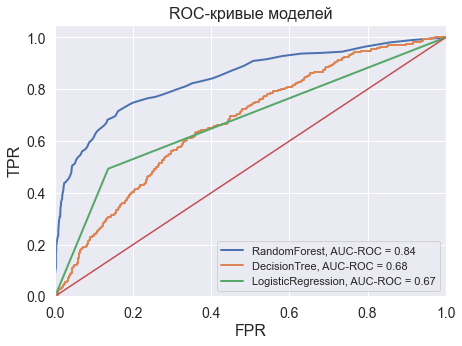

In [42]:
lw=2
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(fpr1, tpr1, lw=lw, label= 'RandomForest, AUC-ROC = %.2f' %roc_auc_rfc)
ax.plot(fpr2, tpr2, lw=lw, label= 'DecisionTree, AUC-ROC = %.2f' %roc_auc_dtc)
ax.plot(fpr3, tpr3, lw=lw, label= 'LogisticRegression, AUC-ROC = %.2f' %roc_auc_lr)

plt.title('ROC-кривые моделей', fontsize=16)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.ylim([0.0, 1.05])
plt.tick_params(which='major', labelsize=14)
plt.show()

Вывод:

- Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 60/20/20
- Обучены модели "Решающее Дерево", "Случайный лес", "Логистическая Регрессия" без учёта дисбаланса классов.

- Максимальное значение метрики f1 = 0.570 получено при обучении модели случайного леса RandomForest. (против f1 = 0.498 DecisionTree и 
- Максимальное значение метрики roc_auc = 0.841 достигнуто при обучении модели случайного леса RandomForest.

- Качество рассмотренных моделей не удовлетворяет условию технического задания, но лучшие показатели оказались у случайного леса RandomForest. 
- Тем не менее RandomForest модель не решает поставленную задачу f1 = 0.59, путается в классах. 
- Необходимо сбалансировать классы и сравнить результаты.

## Борьба с дисбалансом

**Взвешивание классов class_weight='balanced'**

Попытаемся через цикл найти оптимальные параметры для определенной лучшей модели RandomForestClassifier, с применением взвешивания классов class_weight='balanced'. 

Если указать class_weight='balanced' (англ. «сбалансированный»), алгоритм посчитает, во сколько раз класс «0» встречается чаще класса «1».

In [43]:
for depth,estimator in itertools.product(range(1,30,10), range(1,151,50)):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator, class_weight='balanced')
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    score = accuracy_score(predictions, target_valid)
    fscore = f1_score(target_valid, predictions)
    print('Depth: {: >5.0f}       |   Estimators: {:>5.0f}'.format(depth, estimator))
    print('Accuracy: {: >5.4f}   |   F1_Score: {: >5.4f}'.format(score,fscore))
    print('------------------------------------------------------')

Depth:     1       |   Estimators:     1
Accuracy: 0.8155   |   F1_Score: 0.2485
------------------------------------------------------
Depth:     1       |   Estimators:    51
Accuracy: 0.7535   |   F1_Score: 0.5431
------------------------------------------------------
Depth:     1       |   Estimators:   101
Accuracy: 0.7555   |   F1_Score: 0.5451
------------------------------------------------------
Depth:    11       |   Estimators:     1
Accuracy: 0.7575   |   F1_Score: 0.5193
------------------------------------------------------
Depth:    11       |   Estimators:    51
Accuracy: 0.8435   |   F1_Score: 0.6033
------------------------------------------------------
Depth:    11       |   Estimators:   101
Accuracy: 0.8465   |   F1_Score: 0.6119
------------------------------------------------------
Depth:    21       |   Estimators:     1
Accuracy: 0.7790   |   F1_Score: 0.4920
------------------------------------------------------
Depth:    21       |   Estimators:    51
Accurac

Лучший результат F1_score = 0.6154 и accuracy_score : 0.8475 достигается при глубине деревьев Depth = 11 и Estimators = 101 . Попробуем улучшить показатели.

### Метод уменьшения обучающей выборки downsampling 

In [44]:
# функция для уменьшения выборки 
def downsample(features, target, fraction):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]) 
    
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]) 

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
 
    return features_downsampled, target_downsampled

In [45]:
for i in np.arange(0.03, 0.31, 0.03):
    features_downsampled, target_downsampled = downsample(features_train, target_train, i)
    model = RandomForestClassifier(random_state=12345)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    print("F1_Score: {: >5.3f}  |  Fractions : {: >5.3f}".format(f1_score(target_valid, predictions), i))

F1_Score: 0.365  |  Fractions : 0.030
F1_Score: 0.417  |  Fractions : 0.060
F1_Score: 0.463  |  Fractions : 0.090
F1_Score: 0.494  |  Fractions : 0.120
F1_Score: 0.528  |  Fractions : 0.150
F1_Score: 0.538  |  Fractions : 0.180
F1_Score: 0.556  |  Fractions : 0.210
F1_Score: 0.581  |  Fractions : 0.240
F1_Score: 0.599  |  Fractions : 0.270
F1_Score: 0.600  |  Fractions : 0.300


### Метод увеличения обучающей выборки upsampling 

Функция для увеличения выборки  **upsample**

In [46]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [47]:
for repeat in range(1,10,1):
    features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)

    model = RandomForestClassifier(random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    print("F1_Score: {: >5.3f}  |   Repeats : {: >5.0f}".format(f1_score(target_valid, predictions),repeat))

F1_Score: 0.589  |   Repeats :     1
F1_Score: 0.610  |   Repeats :     2
F1_Score: 0.602  |   Repeats :     3
F1_Score: 0.598  |   Repeats :     4
F1_Score: 0.602  |   Repeats :     5
F1_Score: 0.618  |   Repeats :     6
F1_Score: 0.602  |   Repeats :     7
F1_Score: 0.594  |   Repeats :     8
F1_Score: 0.600  |   Repeats :     9


Лучшие параметры F1_Score: 0.607  достигаются при  Repeats :  5. Тем не менее результат не превосходит результат со взвешиванием классов.

### Вывод:

- Через цикл удалось методом подбора количества деревьев и глубины леса подобрать нужные параметры. 
- Улучшения качества метрики модели f1_score не удалось методами downsampling и upsampling.
- Метод upsampling(лучший F1_Score: 0.606  |   Repeats :     9) показал чуть лучшие результаты, чем downsampling (F1_Score: 0.595  |  Fractions : 0.300)
- Лучший результат F1_score = 0.6154 и accuracy_score : 0.8475 достигается при глубине деревьев Depth = 11 и Estimators = 101

## Тестирование модели

Проведем окончательное тестирование лучшей модели на тестовой выборке.

In [48]:
#инициализируем модель RandomForestClassifier с лучшими параметрами
best_model = RandomForestClassifier(random_state=12345, n_estimators=101, max_depth=11, class_weight='balanced')

# обучаем модель на тренировочной выборке
best_model.fit(features_train, target_train)

# получим предсказания модели на тестовой выборке
predicted_test = best_model.predict(features_test)

accuracy_valid = accuracy_score(predicted_test, target_test)
f1_score_test = f1_score(target_test, predicted_test)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
# roc_auc_score на вход принимает не предсказания, а вероятности класса «1» probabilities_one_test
auc_roc = roc_auc_score(target_test, probabilities_one_test) 

print("Лучшая модель RandomForestClassifier с параметрами n_estimators = 101 и depth = 11 и class_weight='balanced'")
print('------------------------------------------------------')

print('Accuracy лучшей модели на тестовой выборке:', accuracy_valid)
print('F1_Score лучшей модели на тестовой выборке:', f1_score_test)
print("roc_auc_score лучшей модели на тестовой выборке:", 
      auc_roc)

Лучшая модель RandomForestClassifier с параметрами n_estimators = 101 и depth = 11 и class_weight='balanced'
------------------------------------------------------
Accuracy лучшей модели на тестовой выборке: 0.8465
F1_Score лучшей модели на тестовой выборке: 0.6038709677419356
roc_auc_score лучшей модели на тестовой выборке: 0.8453358038349741


### Вывод: 

Удалось получить удовлетворяющее техническому заданию значение метрики f1=0,615 (на тестовой выборке) на модели случайного леса с параметрами n_estimators = 101 и depth = 11 и class_weight='balanced'

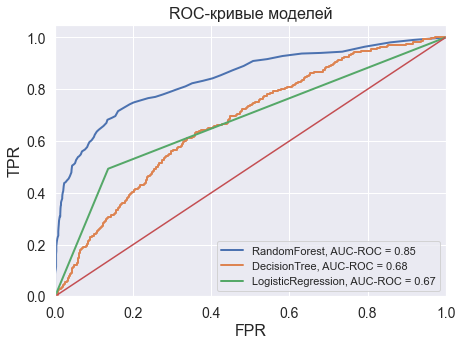

In [49]:
lw=2
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(fpr1, tpr1, lw=lw, label= 'RandomForest, AUC-ROC = %.2f' %auc_roc)
ax.plot(fpr2, tpr2, lw=lw, label= 'DecisionTree, AUC-ROC = %.2f' %roc_auc_dtc)
ax.plot(fpr3, tpr3, lw=lw, label= 'LogisticRegression, AUC-ROC = %.2f' %roc_auc_lr)

plt.title('ROC-кривые моделей', fontsize=16)
plt.legend(loc='lower right')
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])

plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)

plt.ylim([0.0, 1.05])
plt.tick_params(which='major', labelsize=14)
plt.show()

## Вывод:

- Произведена предобработка данных.
    - Числовые и категориальные признаки преобразованы методом оптимальной техникой кодирования One-Hot Encoder. 
    - Распределение внутри целевого признака "факт ухода клиента" 4:1. То есть каждый пятый клиент уходит из «Бета-Банка».
    - Заполнены пропуски в tenure(10% пропусков) случайными значениями.  
- Проведён анализ моделей без учёта дисбаланса классов.
    - Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 60/20/20
    - Обучены модели `DecisionTree`, `RandomForest`, `LogisticRegression` без учёта дисбаланса классов. Максимальное значение метрики f1 = 0.57 получено при обучении модели `RandomForest`.
    - Качество моделей также оценено по метрике roc_auc. Максимальное значение метрики roc_auc = 0.71 достигнуто при обучении модели `RandomForest`.
- Проведён анализ дисбаланса классов
    - Взвешивание классов с помощью параметра class_weight позволило увеличить метрику f1.
    - Улучшения качества метрики модели f1_score не удалось методами downsampling и upsampling.
    - Метод upsampling(лучший F1_Score: 0.606  |   Repeats :     9) показал чуть лучшие результаты, чем downsampling (F1_Score: 0.595  |  Fractions : 0.300)
    - Проведено тестирование полученной модели на тестовой выборке:
    - Значение метрик f1=0,615, roc_auc = 0.847 на тестовой выборке RandomForest: